## 环境和分布偏移
许多失败的机器学习部署（即实际应⽤）都可以追究到这种⽅式。有时，根据测试集的精度衡量，模型表现
得⾮常出⾊。但是当数据分布突然改变时，模型在部署中会出现灾难性的失败。更隐蔽的是，有时模型的部
署本⾝就是扰乱数据分布的催化剂。举⼀个有点荒谬却可能真实存在的例⼦。假设我们训练了⼀个贷款申请
⼈违约⻛险模型，⽤来预测谁将偿还贷款或违约。这个模型发现申请⼈的鞋⼦与违约⻛险相关（穿⽜津鞋申
请⼈会偿还，穿运动鞋申请⼈会违约）。此后，这个模型可能倾向于向所有穿着⽜津鞋的申请⼈发放贷款，并
拒绝所有穿着运动鞋的申请⼈。  

这种情况可能会带来灾难性的后果。⾸先，⼀旦模型开始根据鞋类做出决定，顾客就会理解并改变他们的⾏
为。不久，所有的申请者都会穿⽜津鞋，⽽信⽤度却没有相应的提⾼。总⽽⾔之，机器学习的许多应⽤中都
存在类似的问题：通过将基于模型的决策引⼊环境，我们可能会破坏模型。  

有些解决⽅案很简单（要求“正确”的数据），有些在技术上很困难（实施强化学习系统），还有⼀些解决⽅案要求我们完全跳出统计预测，解决⼀些棘⼿的、与算法伦理应⽤有关的
哲学问题。

## 分布偏移的类型

### 协变量偏移
在不同分布偏移中，协变量偏移可能是最为⼴泛研究的。这⾥我们假设：虽然输⼊的分布可能随时间⽽改变，
但标签函数（即条件分布P(y | x)）没有改变。统计学家称之为协变量偏移（covariate shift），因为这个问题
是由于协变量（特征）分布的变化⽽产⽣的。虽然有时我们可以在不引⽤因果关系的情况下对分布偏移进⾏
推断，但在我们认为x导致y的情况下，协变量偏移是⼀种⾃然假设。  
考虑⼀下区分猫和狗的问题：  
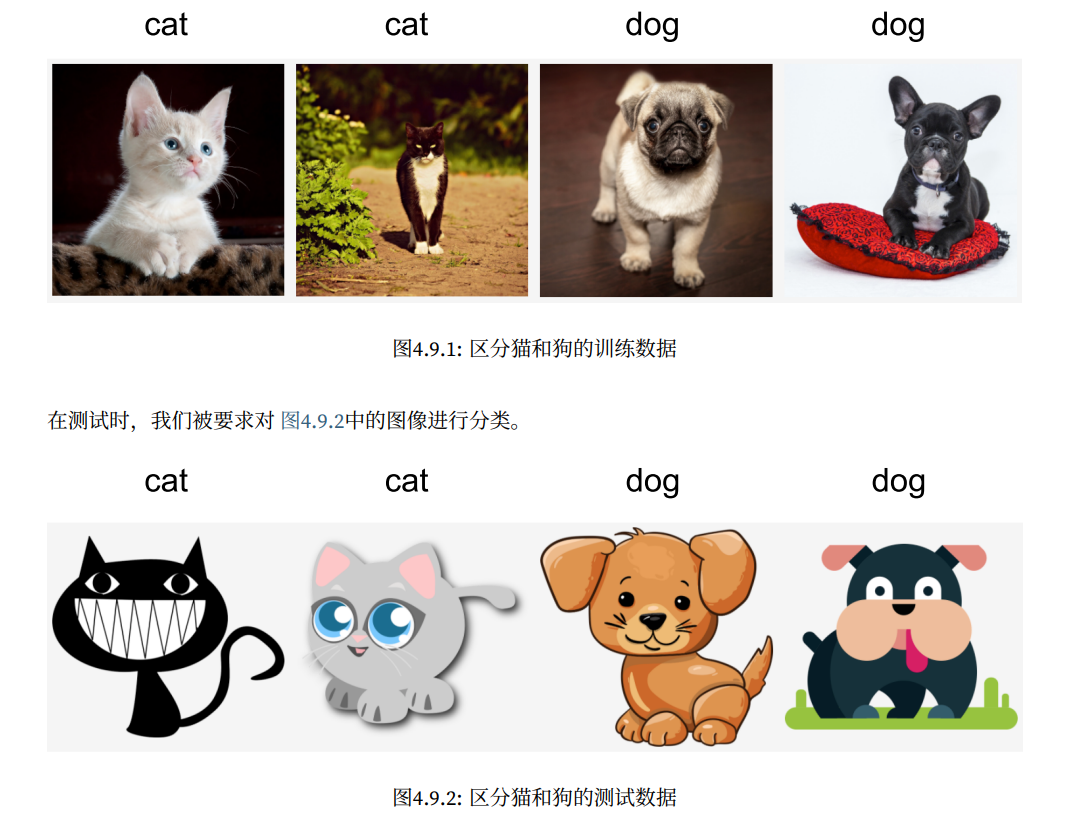  
训练集由真实照⽚组成，⽽测试集只包含卡通图⽚。假设在⼀个与测试集的特征有着本质不同的数据集上进
⾏训练，如果没有⽅法来适应新的领域，可能会有⿇烦。

### 标签偏移
标签偏移（label shift）描述了与协变量偏移相反的问题。这⾥我们假设标签边缘概率P(y)可以改变，但是类
别条件分布P(x | y)在不同的领域之间保持不变。当我们认为y导致x时，标签偏移是⼀个合理的假设。例如，
预测患者的疾病，我们可能根据症状来判断，即使疾病的相对流⾏率随着时间的推移⽽变化。标签偏移在这
⾥是恰当的假设，因为疾病会引起症状。在另⼀些情况下，标签偏移和协变量偏移假设可以同时成⽴。例如，
当标签是确定的，即使y导致x，协变量偏移假设也会得到满⾜。有趣的是，在这些情况下，使⽤基于标签偏
移假设的⽅法通常是有利的。这是因为这些⽅法倾向于包含看起来像标签（通常是低维）的对象，⽽不是像
输⼊（通常是⾼维的）对象。  


### 概念偏移
我们也可能会遇到概念偏移（concept shift）：当标签的定义发⽣变化时，就会出现这种问题。这听起来很奇
怪——⼀只猫就是⼀只猫，不是吗？然⽽，其他类别会随着不同时间的⽤法⽽发⽣变化。精神疾病的诊断标
准、所谓的时髦、以及⼯作头衔等等，都是概念偏移的⽇常映射。事实证明，假如我们环游美国，根据所在
的地理位置改变我们的数据来源，我们会发现关于“软饮”名称的分布发⽣了相当⼤的概念偏移  
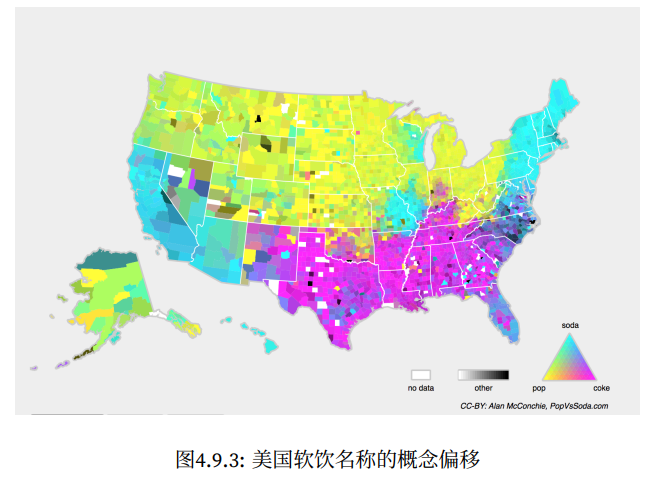  
如果我们要建⽴⼀个机器翻译系统，P(y | x)的分布可能会因我们的位置不同⽽得到不同的翻译。这个问题
可能很难被发现。所以，我们最好可以利⽤在时间或空间上逐渐发⽣偏移的知识。

## 小结
* 在许多情况下，训练集和测试集并不来⾃同⼀个分布。这就是所谓的分布偏移。
* 真实⻛险是从真实分布中抽取的所有数据的总体损失的预期。然⽽，这个数据总体通常是⽆法获得的。经验⻛险是训练数据的平均损失，⽤于近似真实⻛险。在实践中，我们进⾏经验⻛险最⼩化。
* 在相应的假设条件下，可以在测试时检测并纠正协变量偏移和标签偏移。在测试时，不考虑这种偏移可能会成为问题。
* 在某些情况下，环境可能会记住⾃动操作并以令⼈惊讶的⽅式做出响应。在构建模型时，我们必须考虑到这种可能性，并继续监控实时系统，并对我们的模型和环境以意想不到的⽅式纠缠在⼀起的可能性持开放态度。